In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import Holt

In [2]:
df = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
df.index.freq="MS"

In [4]:
holt=Holt(df["Passengers"],initialization_method='legacy-heuristic')

In [5]:
res=holt.fit()

In [6]:
df["Holt"]=res.fittedvalues

<AxesSubplot:xlabel='Month'>

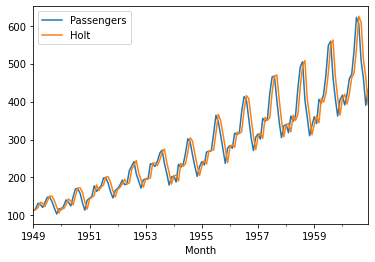

In [7]:
df[["Passengers","Holt"]].plot()

In [8]:
N_test = 12
train=df.iloc[:-N_test]
test=df.iloc[-N_test:]

In [10]:
train_idx=df.index <=train.index[-1]
test_idx=df.index >train.index[-1]

In [11]:
holt=Holt(train["Passengers"],initialization_method='legacy-heuristic')
res=holt.fit()

In [12]:
df.loc[train_idx,"Holt"]=res.fittedvalues
df.loc[test_idx,"Holt"]=res.forecast(N_test)

<AxesSubplot:xlabel='Month'>

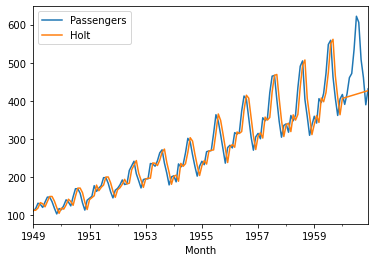

In [13]:
df[["Passengers","Holt"]].plot()